# Clustering

- important inputs: lecture slides 9 & 10 and workshop 10

- Hard Clustering: Partitioning vs. Hierarchical Algorithms
    - k-means, k-meamns ++
    - hierarchical clustering
- distance measures: Euclidean distance (most popular), manhattan & cosine (both less relevant)
    - important for loss functions
- Always scale/standardize features 
    - substract mean, divided by std. deviation or z-scores

- k-means & k-means ++
    - k = number of centers
    - k selected thorugh grid search

- hierarchical clustering:
    - bottom-up & top-down approaches
    - high time complexity
    - interpretation of results is very sbjective
    
- soft clustering: probabilistic clustering --> allows overlapping clusters, i.e. oberservation may belong to multiple clusters
    - expectation maximization of a gaussian mixture model --> gaussian model per cluster

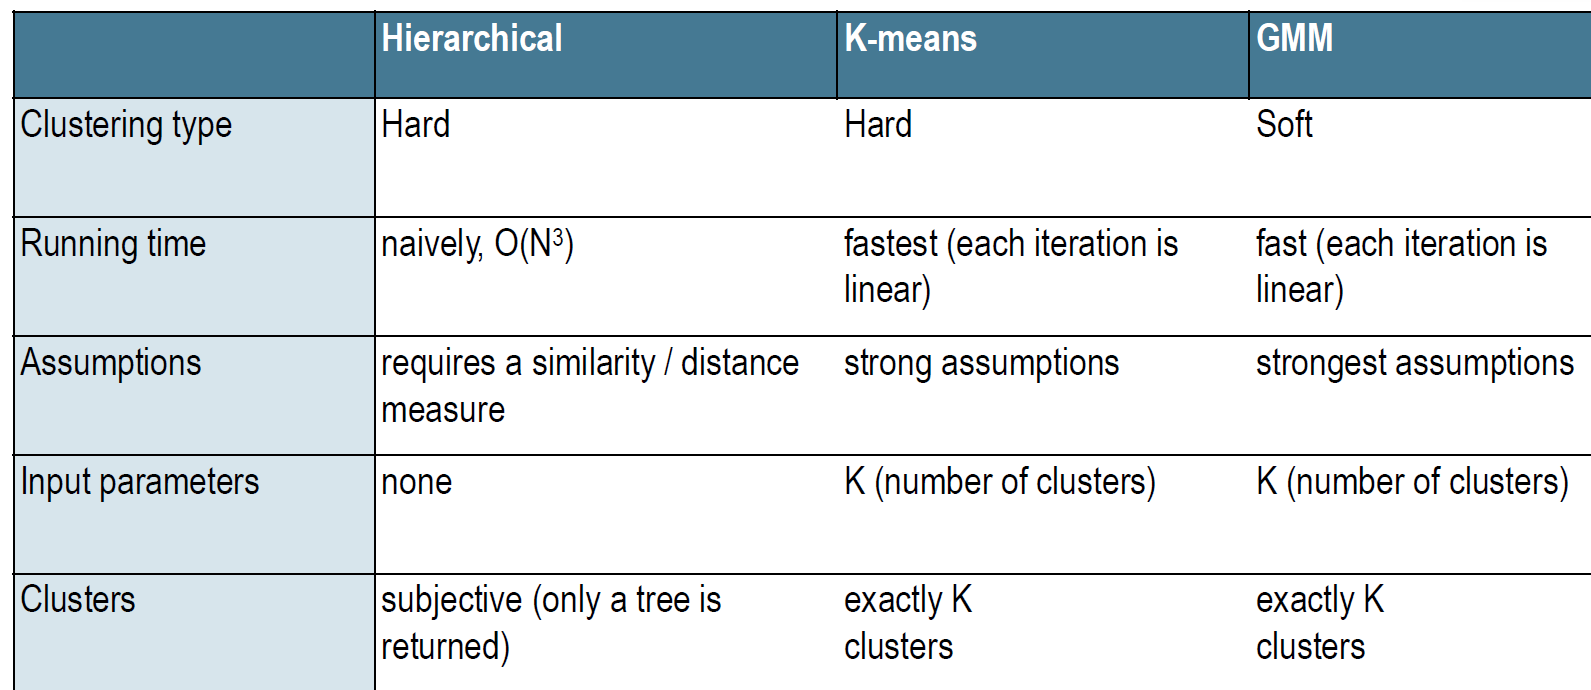


- Overfitting --> number of clusters approximates number of records
- Undefitting --> number of clusters too low 

- Dimension reduction --> Principal component analysis



In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [98]:
df_Trips = pd.read_csv('boston_2017_cleaned_Trips.csv')

# Convert dates to datetime
df_Trips[['start_time','end_time']] = df_Trips[['start_time','end_time']].apply(pd.to_datetime)

In [97]:
df_Trips.head()

start_time            end_time  start_station_id  end_station_id  \
0 2017-01-01 00:06:58 2017-01-01 00:12:49                67             139   
1 2017-01-01 00:13:16 2017-01-01 00:28:07                36              10   
2 2017-01-01 00:16:17 2017-01-01 00:44:10                36               9   
3 2017-01-01 00:21:22 2017-01-01 00:33:50                46              19   
4 2017-01-01 00:30:06 2017-01-01 00:40:28                10               8   

                         start_station_name  \
0              MIT at Mass Ave / Amherst St   
1  Boston Public Library - 700 Boylston St.   
2  Boston Public Library - 700 Boylston St.   
3                   Christian Science Plaza   
4             B.U. Central - 725 Comm. Ave.   

                                end_station_name  bike_id   user_type  \
0                                      Dana Park      644  Subscriber   
1                  B.U. Central - 725 Comm. Ave.      230  Subscriber   
2                  Agganis Arena - 925 Comm Ave.      980    Customer   
3                        Buswell St. at Park Dr.     1834  Subscriber   
4  Union Square - Brighton Ave. at Cambridge St.      230  Subscriber   

   start_hour  weekday  duration  month  
0           0        6     351.0      1  
1           0        6     891.0      1  
2           0        6    1673.0      1  
3           0        6     748.0      1  
4           0        6     622.0      1

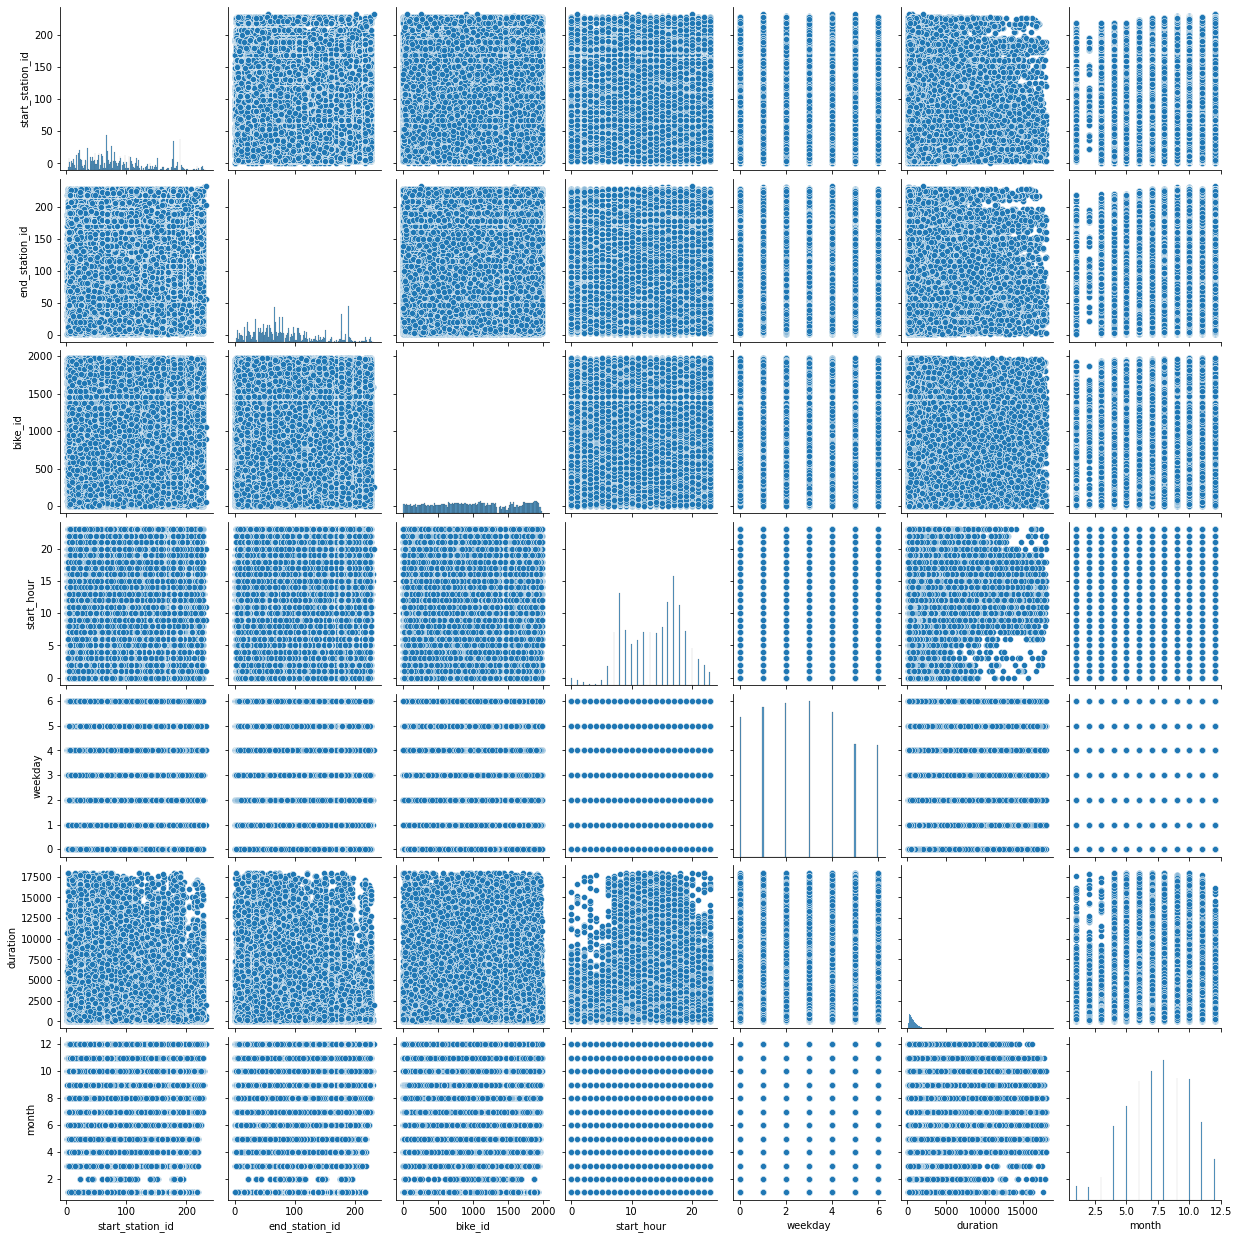

In [6]:
#sns.pairplot(data = df_Trips)

## Data Preparation and Scaling

1. Scaling:
from sklearn.preprocessing import StandardScaler
iris = pd.read_csv('iris.csv', index_col="number").dropna(axis=0)
X = iris.drop("Species", axis=1)
y = iris["Species"]
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

2. Possible visualization: sns.pairplot to visualize all features

3. ggf. PCA to reduce dimensions?

In [99]:
# Create adapted dataset and drop unnecessary features
# ideas: drop station names, bike_id, 

#data = df_Trips[['month', 'weekday','start_hour', 'duration', 'user_type']].copy()
data = df_Trips[['duration', 'start_hour', 'weekday']].copy()

data

duration  start_hour  weekday
0           351.0           0        6
1           891.0           0        6
2          1673.0           0        6
3           748.0           0        6
4           622.0           0        6
...           ...         ...      ...
1310755     249.0          23        6
1310756     262.0          16        4
1310757     984.0           8        5
1310758    1751.0          12        5
1310759    1575.0          18        5

[1310760 rows x 3 columns]

In [100]:
# Encode user_type to numerical value: 0 = subscriber & 1 = customer
#data.loc[data['user_type'] == 'Subscriber', 'user_type'] = 0
#data.loc[data['user_type'] == 'Customer', 'user_type'] = 1

In [85]:
# Scaling
scaler = StandardScaler()
scaler.fit(data)

data_scaled = scaler.transform(data)
data_scaled_df = pd.DataFrame(data_scaled, columns = data.columns, index = data.index)

data_scaled_df

duration  start_hour   weekday
0       -0.517730   -2.876301  1.649883
1       -0.005594   -2.876301  1.649883
2        0.736054   -2.876301  1.649883
3       -0.141216   -2.876301  1.649883
4       -0.260714   -2.876301  1.649883
...           ...         ...       ...
1310755 -0.614467    1.940294  1.649883
1310756 -0.602138    0.474373  0.609987
1310757  0.082607   -1.200964  1.129935
1310758  0.810029   -0.363295  1.129935
1310759  0.643111    0.893208  1.129935

[1310760 rows x 3 columns]

## Principal Component Analysis

## K-Means Clustering

1. Import
from sklearn.cluster import KMeans
k_max = 50

2. Grid search
for k in range(k_max):
    model = KMeans(n_clusters=k+1)
    model.fit(X_scaled)
    clusters.append(k+1)
    losses.append(model.inertia_)
    
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

2.1 Zoom in grid search to detect optimum of clusters
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.xlim([0,10])

3. Fit algorithm
two_means = KMeans(n_clusters=2)
two_means.fit(X_scaled)

3.1 Match records to clusters by calling predict
two_means.predict(X_scaled)


In [77]:
# Grid search
k_max = 10

clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters = k + 1)
    model.fit(data_scaled_df)
    
    clusters.append(k+1)
    losses.append(model.inertia_)

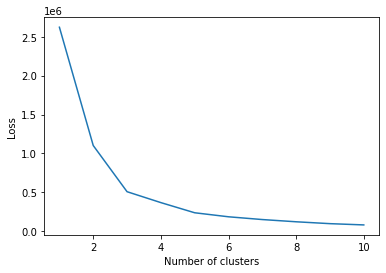

In [78]:
# Plot grid search result
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

In [86]:
# Fit model for optimal k-value
model_fit = KMeans(n_clusters = 4)
model_fit.fit(data_scaled_df)

# Predict clusters
numbers = ['zero', 'one', 'two', 'three']
data_scaled_df['cluster'] = model_fit.predict(data_scaled_df)
data_scaled_df['cluster'] = data_scaled_df['cluster'].apply(lambda x: numbers[x])

In [80]:
data_scaled_df

duration  user_type cluster
0       -0.517730  -0.432816    zero
1       -0.005594  -0.432816    zero
2        0.736054   2.310449     one
3       -0.141216  -0.432816    zero
4       -0.260714  -0.432816    zero
...           ...        ...     ...
1310755 -0.614467  -0.432816    zero
1310756 -0.602138  -0.432816    zero
1310757  0.082607  -0.432816    zero
1310758  0.810029  -0.432816    zero
1310759  0.643111  -0.432816    zero

[1310760 rows x 3 columns]

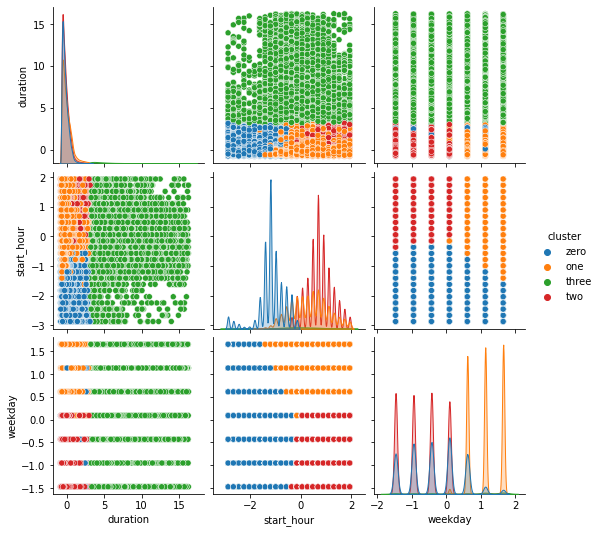

In [87]:
sns.pairplot(data=data_scaled_df, hue = "cluster")

## Hierarchical Clustering ??

Optional